In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hdbscan
import umap
from lib.vector_io import read_fvecs
from lib.paths import DATA_DIR, IMAGES_DIR

/home/abhinav/git/experiments_on_hnsw/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load SIFT descriptors
sift_vectors = read_fvecs(DATA_DIR / "siftsmall_base.fvecs")

In [3]:
# Cluster in high-dimensional space
clusterer = hdbscan.HDBSCAN(min_cluster_size=30)
labels = clusterer.fit_predict(sift_vectors)

/home/abhinav/git/experiments_on_hnsw/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/abhinav/git/experiments_on_hnsw/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [4]:
# Reduce to 2D using UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
sift_2d = reducer.fit_transform(sift_vectors)

/home/abhinav/git/experiments_on_hnsw/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/abhinav/git/experiments_on_hnsw/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


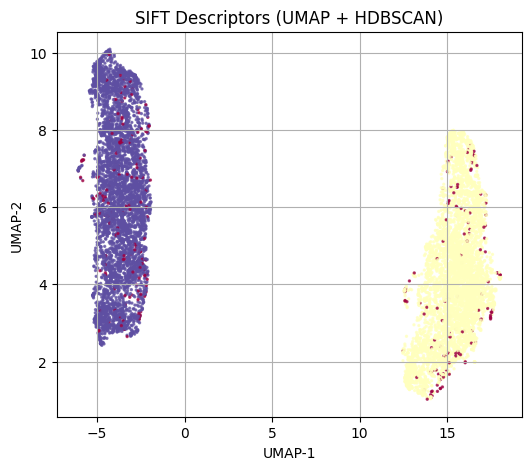

In [5]:
# Plot
plt.figure(figsize=(6, 5))
plt.scatter(sift_2d[:, 0], sift_2d[:, 1], c=labels, cmap='Spectral', s=2, alpha=0.7)
plt.title("SIFT Descriptors (UMAP + HDBSCAN)")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
# Save the plot before showing
plt.savefig(IMAGES_DIR / "umap_hdbscan_clusters.png", bbox_inches='tight', dpi=300)
plt.show()